## CLASSIFICATION OF HEART DISEASE USING LOGISTIC REGRESSION MODEL

In [1]:
## Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
## Reading the Dataset 
data = pd.read_csv('heart.csv', encoding='unicode_escape')
print(data.shape)
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
Max = [77, 1, 3, 200, 603, 1, 2, 202, 1, 6.2, 2]          # Max values for each feature from the dataset
Min = [28, 0, 0, 0, 0, 0, 0, 60, 0, -2.6, 0]              # Min values for each feature from the dataset

## Saving Max and Min values as .npy file
np.save("Max", Max)
np.save("Min", Min)

## String Data Conversion to Int

In [4]:
def dataReplace(data):
    '''
    This fucntion converts string data type to int data type.
    The model takes the following arguments:
    
    Data (Features containing String data type)
    
    returns:
    Data (Features converted to Int data type)
    '''
    
    data['Sex'][data['Sex'] == 'F'] = 0                                    # Replace F with 0
    data['Sex'][data['Sex'] == 'M'] = 1                                    # Replace M with 1

    data['ChestPainType'][data['ChestPainType'] == 'ATA'] = 0              # Replace ATA with 0
    data['ChestPainType'][data['ChestPainType'] == 'NAP'] = 1              # Replace NAP with 1
    data['ChestPainType'][data['ChestPainType'] == 'ASY'] = 2              # Replace ASY with 2
    data['ChestPainType'][data['ChestPainType'] == 'TA'] = 3               # Replace TA with 3

    data['RestingECG'][data['RestingECG'] == 'Normal'] = 0                 # Replace Normal with 0
    data['RestingECG'][data['RestingECG'] == 'ST'] = 1                     # Replace ST with 1
    data['RestingECG'][data['RestingECG'] == 'LVH'] = 2                    # Replace LVH with 2

    data['ExerciseAngina'][data['ExerciseAngina'] == 'N'] = 0              # Replace N with 0
    data['ExerciseAngina'][data['ExerciseAngina'] == 'Y'] = 1              # Replace Y with 1

    data['ST_Slope'][data['ST_Slope'] == 'Up'] = 0                         # Replace Up with 0
    data['ST_Slope'][data['ST_Slope'] == 'Flat'] = 1                       # Replace Flat with 1
    data['ST_Slope'][data['ST_Slope'] == 'Down'] = 2                       # Replace Down with 2

    return data

## Feature Scaling

In [5]:
def scale(data):
    '''
    This fucntion performs data scaling from -1 to 1 using min-max critera.
    The model takes the following arguments:
    
    Data (numpy array): Input dataset
    
    returns:
    Scaled Data (numpy array)
    '''
    
    dataScale = 2*((data - data.min()) / (data.max() - data.min())) - 1    # Feature Scaling from -1 to 1
    dataScale['HeartDisease'] = data['HeartDisease']                       # Not applying Scaling on Y
    return dataScale

## Dataset Splitting

In [6]:
data = dataReplace(data)                          # Calling the Data Conversion Function and assigning it to variable data
data = scale(data)                                # Calling the Feature Scaling Function and assigning it to variable data

# Splitting the Dataset into Train set(60%), Cross Validation set(20%) and Test set(20%).
train, val, test = np.split(data.sample(frac=1), [int(0.6 * len(data)), int(0.8 * len(data))])
print(train.shape)
print(val.shape)
print(test.shape)
data.head()

(550, 12)
(184, 12)
(184, 12)


<ipython-input-4-41c5cb290b52>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][data['Sex'] == 'F'] = 0                                    # Replace F with 0
<ipython-input-4-41c5cb290b52>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][data['Sex'] == 'M'] = 1                                    # Replace M with 1
<ipython-input-4-41c5cb290b52>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ChestPainT

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.510204,1.0,-1.0,0.4,-0.041459,-1.0,-1.0,0.577465,-1.0,-0.409091,-1.0,0
1,-0.142857,-1.0,-0.333333,0.6,-0.402985,-1.0,-1.0,0.352113,-1.0,-0.181818,0.0,1
2,-0.632653,1.0,-1.0,0.3,-0.06136,-1.0,0.0,-0.464789,-1.0,-0.409091,-1.0,0
3,-0.183673,-1.0,0.333333,0.38,-0.290216,-1.0,-1.0,-0.323944,1.0,-0.068182,0.0,1
4,0.061224,1.0,-0.333333,0.5,-0.353234,-1.0,-1.0,-0.126761,-1.0,-0.409091,-1.0,0


## Features and Labels Extraction

In [7]:
X_data = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", 
          "ExerciseAngina", "Oldpeak", "ST_Slope"]                # Extracting Features
Y_data = ["HeartDisease"]                                         # Extracting Labels

X_train = train[X_data]                                           # Assigning Features to X_train               
Y_train = train[Y_data]                                           # Assigning Features to Y_train

X_val = val[X_data]                                               # Assigning Features to X_val
Y_val = val[Y_data]                                               # Assigning Features to Y_val

X_test = test[X_data]                                             # Assigning Features to X_test
Y_test = test[Y_data]                                             # Assigning Features to Y_test

In [8]:
X_train = X_train.values                                          # Extracting values from X_train
Y_train = Y_train.values                                          # Extracting values from Y_train

X_val = X_val.values                                              # Extracting values from X_val
Y_val = Y_val.values                                              # Extracting values from Y_val

X_test = X_test.values                                            # Extracting values from X_test
Y_test = Y_test.values                                            # Extracting values from Y_test

In [9]:
X_train = X_train.T                                               # Taking Transpose of the Training Features
Y_train = Y_train.reshape(1, X_train.shape[1])                    # Reshaping Training Labels 
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)

X_val = X_val.T                                                   # Taking Transpose of the Cross Validation Features
Y_val = Y_val.reshape(1, X_val.shape[1])                          # Reshaping Cross Validation Labels 
print("Shape of X_val : ", X_val.shape)
print("Shape of Y_val : ", Y_val.shape)

X_test = X_test.T                                                 # Taking Transpose of the Testing Features
Y_test = Y_test.reshape(1, X_test.shape[1])                       # Reshaping Testing Labels 
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (11, 550)
Shape of Y_train :  (1, 550)
Shape of X_val :  (11, 184)
Shape of Y_val :  (1, 184)
Shape of X_test :  (11, 184)
Shape of Y_test :  (1, 184)


## Sigmoid Function

In [10]:
def sigmoid(x):
    '''
    This fucntion creates a Sigmoid Funtion on given features and features.
    The model takes the following arguments:
    
    X (numpy array): Input data
    
    returns:
    Sigmoid Function
    '''
    x = x.astype('float64')
    return 1/(1 + np.exp(-x))

## Logistic Regression Model

In [35]:
def model(X, Y, X_val, Y_val, learning_rate, iterations, lamda, verbose = True):
    '''
    This fucntion creates a model and trains it on the supplied dataset using the
    provided learning rate and regularization for a given number of iterations.
    The model takes the following arguments:
    
    X (numpy array): Input dataset
    Y (numpy array): Actual labels
    learning_rate (float): 0.001
    iterations (int): 30000
    lamda (float): [0, 0.01, 0.1, 1, 10]
    
    returns:
    W (numpy array): The weights of the model
    B (numpy array): The Bias value of the model
    cost_list (list): list of all the cost values for the given iterations
    '''
    
    m = X.shape[1]                                           # Number of Training Examples
    n = X.shape[0]                                           # Number of Training Features 
    
    m_val = X_val.shape[1]                                   # Number of Cross Validation Examples
    n_val = X_val.shape[0]                                   # Number of cross Validation Features 
    
    W = np.zeros((n,1))                                      # Intiallizing wieghts to zero
    B = 0                                                    # Initiallizing bias to zero
    
    train_cost_list = []                                     # Initialling Cost Function List as empty
    val_cost_list = []                                       # Initialling Validation Cost Function List as empty
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B                               # Function for Training Set 
        h = sigmoid(Z)                                       # Implementing Sigmoid Funtion on the Hypothesis Model
        
        Z_val = np.dot(W.T, X_val) + B                       # Function for Validation Set
        h_val = sigmoid(Z_val)                               # Implementing Sigmoid Funtion on the Hypothesis Model
        
        # Cost Function
        cost = (-(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))) + ((lamda / (2 * m)) * np.sum(W**2))

        # Training Error Estimation
        cost_train = (-(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)))
        
        # Validation Error Estimation 
        cost_val = (-(1 / m_val) * np.sum(Y_val * np.log(h_val) + (1 - Y_val) * np.log(1 - h_val)))
        
        # Gradient Descent
        dW = (1 / m) * np.dot(h - Y, X.T)
        dB = (1 / m) * np.sum(h - Y)
        
        # Updating Weights and Bias Parameters
        W = W - learning_rate * (dW.T + ((lamda / m) * W))    # Applying Regularization
        B = B - learning_rate * dB
        
        # Keeping track of our cost function values
        train_cost_list.append(cost_train)                    # Stacking all train costs in a list
        val_cost_list.append(cost_val)                        # Stacking all validation costs in a list

        
        if(i%(iterations/10) == 0):
            print("val cost after ", i , "iteration is : ", cost_val)
            
        if verbose:
            if(i%(iterations/10) == 0):
                print("cost after ", i , "iteration is : ", train_cost)
                h[h>0.5] = 1
                h[h<=0.5] = 0
                print("Accuracy:", ((h == Y).sum())/Y.shape[1])
                print("Weight afters", i , "iteration is : ", W)
        
    return W, B, train_cost_list, val_cost_list

## Model Training Implementation on Training Dataset

val cost after  0 iteration is :  0.6931471805599453
val cost after  1000 iteration is :  0.36768443875208334
val cost after  2000 iteration is :  0.3613561968943372
val cost after  3000 iteration is :  0.35914582158699915
val cost after  4000 iteration is :  0.35808880539336807
val cost after  5000 iteration is :  0.3576036956867511
val cost after  6000 iteration is :  0.35743474461342956
val cost after  7000 iteration is :  0.3574429922266348
val cost after  8000 iteration is :  0.35754901667042066
val cost after  9000 iteration is :  0.357706278515928
Min Train Cost Error = 0.30851787546987575
Min Validation Error = 0.3574221820590696


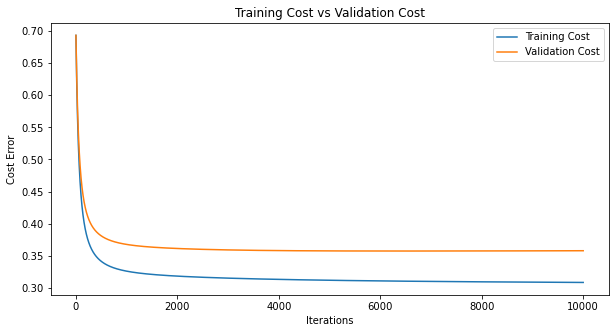

In [36]:
iterations = 10000                                              # Number of times the Model will run to optimize parameters
learning_rate = 0.03                                           # Alpha is the step frequency for Gradient Descent
lamda = 0.1                                                    # Regularization Parameter
polynomial = 2                                                 # 2nd Degree Polynomial Model

train_X = X_train.copy()                                       # Make a copy of Training Features and Assign it to the variable                                       
val_X = X_val.copy()                                           # Make a copy of Validation Features and Assign it to the variable
        
train_X = np.append(train_X, X_train**polynomial, axis = 0)    # Designing 2nd Degree Polynomial Features for Training Set
val_X = np.append(val_X, X_val**polynomial, axis = 0)          # Designing 2nd Degree Polynomial Features for Validation Set


## Training the Selected Model on Training Set and retrieving optimized Weights and Bias, also training and validation cost functions 
W, B, train_cost_list, val_cost_list = model(train_X.astype('float64'), Y_train.astype('float64'), val_X.astype('float64'), Y_val.astype('float64'), learning_rate = learning_rate, iterations = iterations, lamda = lamda, verbose = False)


print('Min Train Cost Error = ' + str(np.min(train_cost_list)))      # Determining Minimum Training Cost Error
print('Min Validation Error = ' + str(np.min(val_cost_list)))        # Determining Minimum Validation Error


plt.figure()
plt.title(f"Training Cost vs Validation Cost")
plt.plot(train_cost_list, label = "Training Cost")
plt.plot(val_cost_list, label = "Validation Cost")
plt.xlabel('Iterations')
plt.ylabel('Cost Error')
plt.legend()
plt.show()


## Saving Weights and Bias Parameters for Prediction

In [29]:
np.save('Weights', W)
np.save('Bias', B)

## Accuracy of the Selected Trained Model

In [24]:
def accuracy(X, Y, W, B):
    '''
    This fucntion tests the trained model that is selected on the basis of minimum cost function. 
    The model will have have its minimized wieght parameters and optimum regularization parameter. 
    The model takes the following arguments:
    
    X (numpy array): Input dataset
    Y (numpy array): Actual labels
    W (numpy array): Minimized Weights
    B (int): Bias
    
    returns:
    Model's Accuracy (float)
    '''
    m = X.shape[1]                                                 # Number of Dataset Examples
    X = np.append(X, X**2, axis = 0)                               # 2nd Degree Polynomial Features

    Z = np.dot(W.T, X) + B                                         # Calculation Z
    h = sigmoid(Z)                                                 # 2nd Degree Hypothesis Logistic Regression Model
    
    mean_error = -(1 / m) * (np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)))  # Mean Error for Corresponding Dataset
    print("Error:", mean_error)
    
    h[h>=0.5] = 1                                                  # Thresholding where if h >= 0.5, then h = 1
    h[h<0.5] = 0                                                   # Thresholding where if h < 0, then h = 0
    h = np.array(h, dtype = 'int64')
        
    acc = (1 - np.sum(np.absolute(h - Y))/Y.shape[1])*100          # Calculating Accuracy of Model on Corresponding Dataset
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [25]:
## Testing the Training Dataset on Trained Model and Determining Accuracy 
accuracy(X_train, Y_train, W, B)

Error: 0.30851748008438473
Accuracy of the model is :  88.73 %


In [26]:
## Testing the Validation Dataset on Trained Model and Determining Accuracy
accuracy(X_val, Y_val, W, B)

Error: 0.3578870170677041
Accuracy of the model is :  84.78 %


In [27]:
## Testing the Test Dataset on Trained Model and Determining Accuracy
accuracy(X_test, Y_test, W, B)

Error: 0.3940107419292262
Accuracy of the model is :  86.41 %


## Confusion Matrix

In [30]:
def conf_mat(X, Y):
    m = X.shape[1]                                                 # Number of Dataset Examples
    X = np.append(X, X**2, axis = 0)                               # 2nd Degree Polynomial Features

    Z = np.dot(W.T, X) + B                                         # Calculation Z
    h = sigmoid(Z)                                                 # 2nd Degree Hypothesis Logistic Regression Model
    
    # confusion matrix
    conf_arr = [[0, 0], [0, 0]]                                    # 2 x 2 confusion matrix

    for i in range(len(h)):
        if int(Y[i]) == 1:                                         # if actual label = 1
            if float(h[i]) < 0.5:                                  # and if predicted label < 0.5
                conf_arr[0][1] = conf_arr[0][1] + 1                # then add 1 to False Negative
            else:
                conf_arr[0][0] = conf_arr[0][0] + 1                # else add 1 to True Positive
        elif int(Y[i]) == 0:                                       # if actual label = 0
            if float(prob_arr[i]) >= 0.5:                          # and if predicted label > 0.5                
                conf_arr[1][0] = conf_arr[1][0] + 1                # then add 1 to False Positive
            else:
                conf_arr[1][1] = conf_arr[1][1] + 1                # else add 1 to True Negative

    accuracy = float(conf_arr[0][0] + conf_arr[1][1])/(len(input_arr))   # Determining Accuracy
    Precision = (conf_arr[0][0]) / (conf_arr[0][0] + conf_arr[1][0])
    Recall = (conf_arr[0][0]) / (conf_arr[0][0] + conf_arr[0][1])
    F1_Score = 2 * ((Precision * Recall)/(Precision + Recall))
    
    
    print(conf_array)
    print(accuracy)
    print(Precision)
    print(Recall)
    Print(F1_Score)
    return conf_array, accuracy, Precision, Recall, F1_Score